In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality/delhi_aqi.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('/kaggle/input/delhi-air-quality/delhi_aqi.csv')
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [3]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [4]:
df.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [6]:
df.size

168984

In [7]:
df.shape

(18776, 9)

In [8]:
col_use=['no','no2','o3','so2','pm2_5','pm10','nh3','co']
df=df[col_use]

In [9]:
df.shape

(18776, 8)

In [10]:
df.isnull().sum()

no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
co       0
dtype: int64

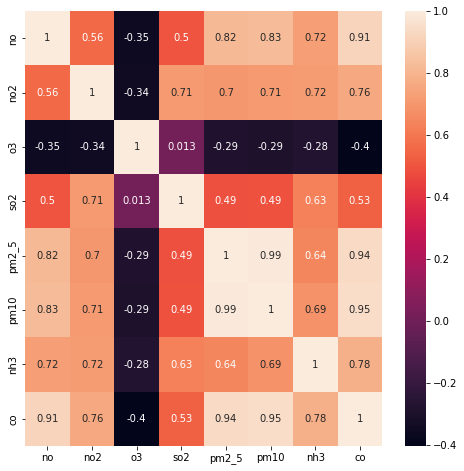

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

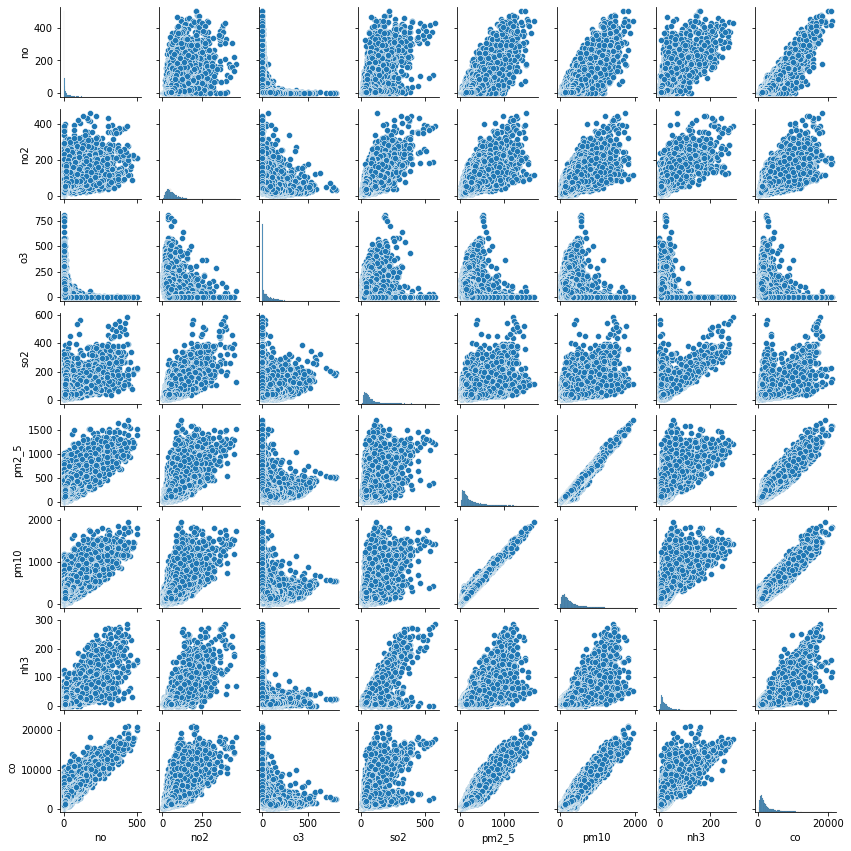

In [12]:
plt.figure(figsize=(10,10))
sns.pairplot(df,height=1.5)
plt.show()

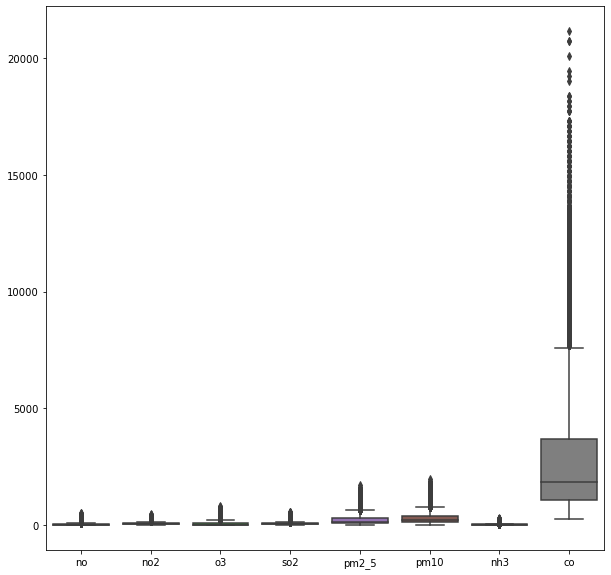

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

In [14]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[ (df[cols]>high)] = df[cols].median()

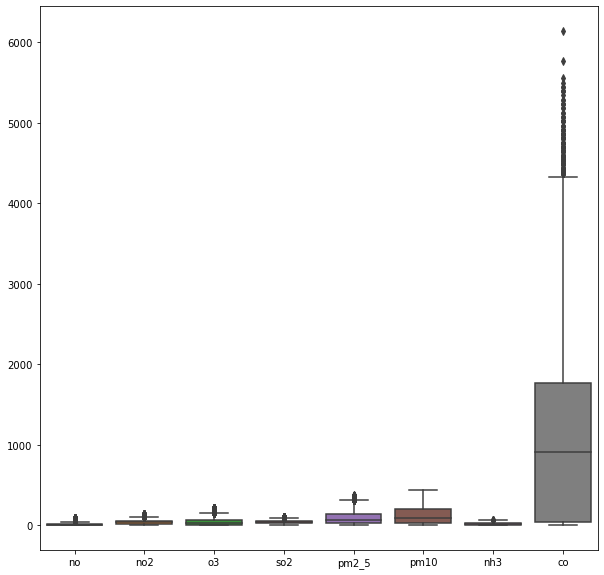

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

In [16]:
X=df['pm10'].values.reshape(-1,1)
Y=df['co'].values

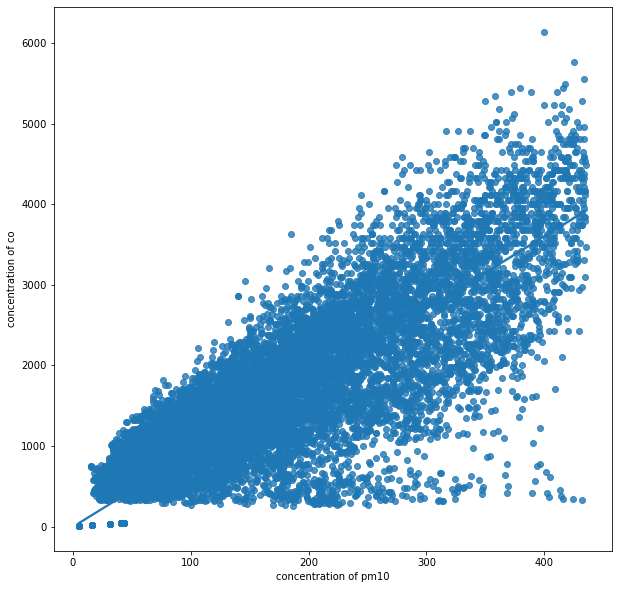

In [17]:
plt.figure(figsize=(10,10));
sns.regplot(X, Y);
plt.xlabel('concentration of pm10')
plt.ylabel("concentration of co")
plt.show();

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
print("training score is",model.score(X_train,y_train))

training score is 0.7967184939351699


In [22]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.7956719159553969


In [23]:
y_Pred=model.predict(X_test)

In [24]:
print("mean squared error is ", r2_score(y_Pred,y_test))

mean squared error is  0.7410127943196718


In [25]:
print("r2 score is ", r2_score(y_Pred,y_test))

r2 score is  0.7410127943196718


In [26]:
X=df.drop('co',axis=1)
X.shape

(18776, 7)

In [27]:
Y=df['co']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
print("training score is",model.score(X_train,y_train))

training score is 0.8874822342048637


In [32]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8835719781942853


In [33]:
y_Pred=model.predict(X_test)

In [34]:
print("mean squared error is ", r2_score(y_Pred,y_test))

mean squared error is  0.868104641863981


In [35]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.868104641863981


In [36]:
y_Pred

array([ -33.96492053,  301.75311197,  -33.96492053, ..., 2281.22254099,
       1099.98010073, 1265.30760173])